<a href="https://colab.research.google.com/github/sophie210286/DSCI-4850-Final-Project/blob/main/SOBELL_MLProject_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Project

#### **Link to Download Dataset**

https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset

#### **Packages Required**

In [ ]:
# Importing Packages for entire project

# General Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,learning_curve,KFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer


# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#### **Data Collection and Problem Statement**

##### Uploading Dataset

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving framingham.csv to framingham.csv


In [ ]:
path = "/content/framingham.csv"
df = pd.read_csv(path)
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

#####***Problem Statement***



The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. 


> The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease.

#### **Data Exploration**

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<Axes: >

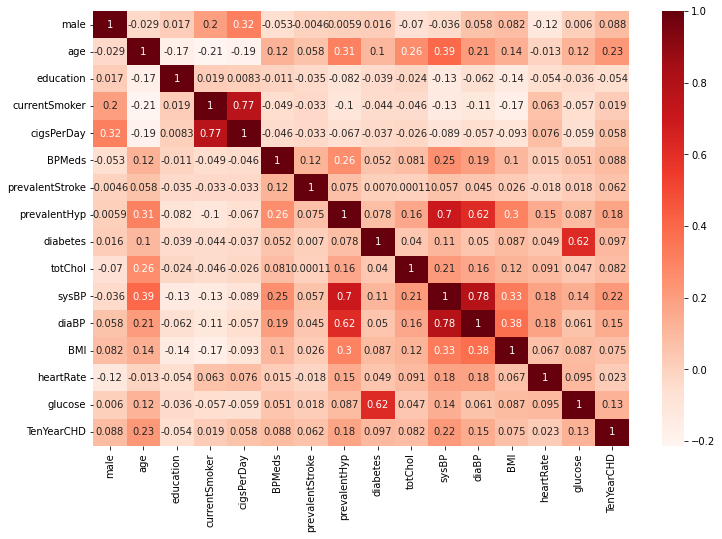

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Reds")

In [ ]:
# see how many missing values there are
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

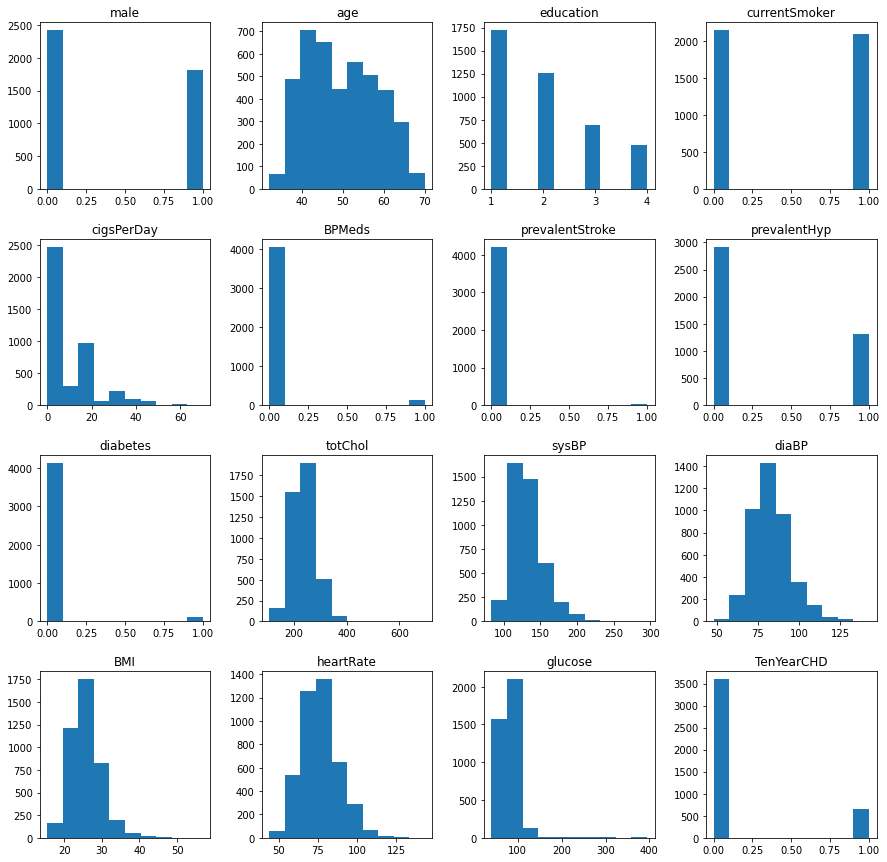

In [ ]:
# visuaize the data
df.hist(figsize = (15,15), grid = False);

#### **Models**

##### <u>1. Random Forest

<div align="center"> TRAINING

---




-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 8, 'clf__n_estimators': 600, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 6, 'clf__max_features': 'log2', 'clf__max_depth': 4, 'clf__class_weight': 'balanced'}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.281734      0.640845  0.391398        0.703354
fold 2          0.282219      0.594502  0.382743        0.707547
fold 3          0.268182      0.629893  0.376196        0.692348
fold 4          0.286385      0.624573  0.392704        0.703354
fold 5          0.292020      0.609929  0.394948        0.723795
fold 6          0.292484      0.619377  0.397336        0.715409
fold 7          0.288998      0.600683  0.390244        0.711740
fold 8          0.290064      0.624138  0.396061        0.710692
fold 9          0.282748      0.610345  0.386463        0.70545

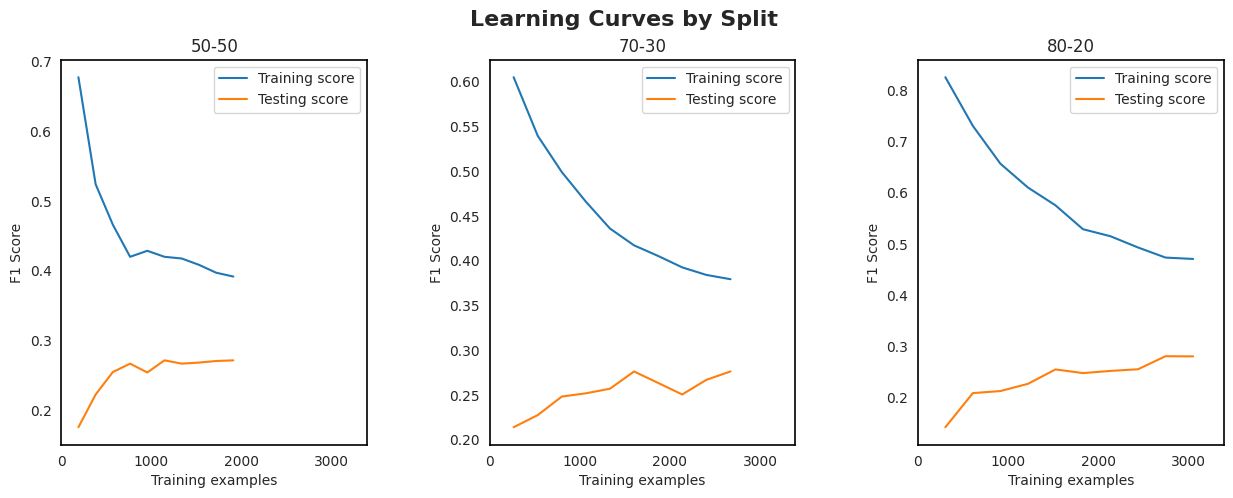


The best split is 80-20 with a mean f1 score of 0.46965827074003863.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
         'clf__n_estimators': np.arange(100, 1000, 100),
         'clf__max_depth' : np.arange(1, 20),
         'clf__min_samples_split' : np.arange(2, 10),
         'clf__min_samples_leaf': np.arange(1, 10),
         'clf__max_features' : ['auto', 'sqrt', 'log2'],
         'clf__class_weight': [None, 'balanced']
         }
    
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---

----------Random Forest Classification Report----------

               precision    recall  f1-score   support

           0       0.87      0.74      0.80       717
           1       0.22      0.40      0.28       131

    accuracy                           0.69       848
   macro avg       0.55      0.57      0.54       848
weighted avg       0.77      0.69      0.72       848





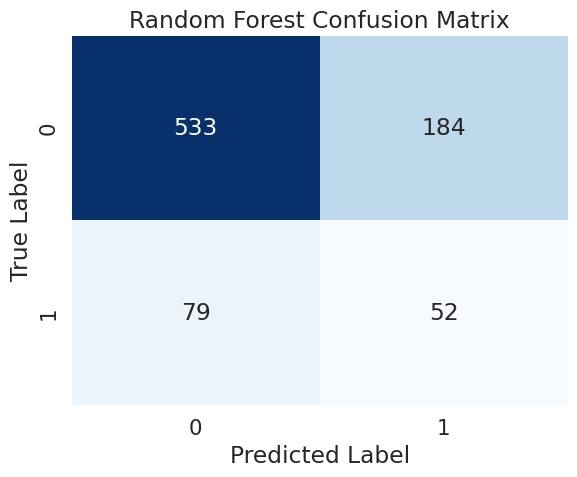

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.2, random_state=1234)

# {'preprocessor__imputer__n_neighbors': 14, 'clf__n_estimators': 200, 'clf__min_samples_split': 4, 
# 'clf__min_samples_leaf': 4, 'clf__max_features': 'sqrt', 'clf__max_depth': 6, 'clf__class_weight': 'balanced'}

missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=14), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators = 200,
                                   min_samples_split = 4,
                                   min_samples_leaf = 4,
                                   max_features = 'sqrt',
                                   max_depth = 6,
                                   class_weight = "balanced"
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred1 = pipeline.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test,y_pred1)
rec1 = recall_score(y_test,y_pred1)
F11 = f1_score(y_test,y_pred1)


print(f"Random Forest Classification Report".center(55, "-"))
print('\n',classification_report(y_test, y_pred1))
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred1)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u>2. Perceptron

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 8, 'clf__max_iter': 1000, 'clf__alpha': 4.037017258596558e-05}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.227431      0.461268  0.304651        0.686583
fold 2          0.232877      0.296167  0.260736        0.747379
fold 3          0.390476      0.142361  0.208651        0.837002
fold 4          0.229773      0.240678  0.235099        0.757862
fold 5          0.145957      0.256944  0.186164        0.660901
fold 6          0.121721      0.391892  0.185749        0.466981
fold 7          0.220963      0.268966  0.242613        0.744759
fold 8          0.197248      0.150877  0.170974        0.781447
fold 9          0.185075      0.214533  0.198718        0.737945
fold 10         0.283019      0.101351  0.149254        0.820755
mean            0.223454      0.252504 

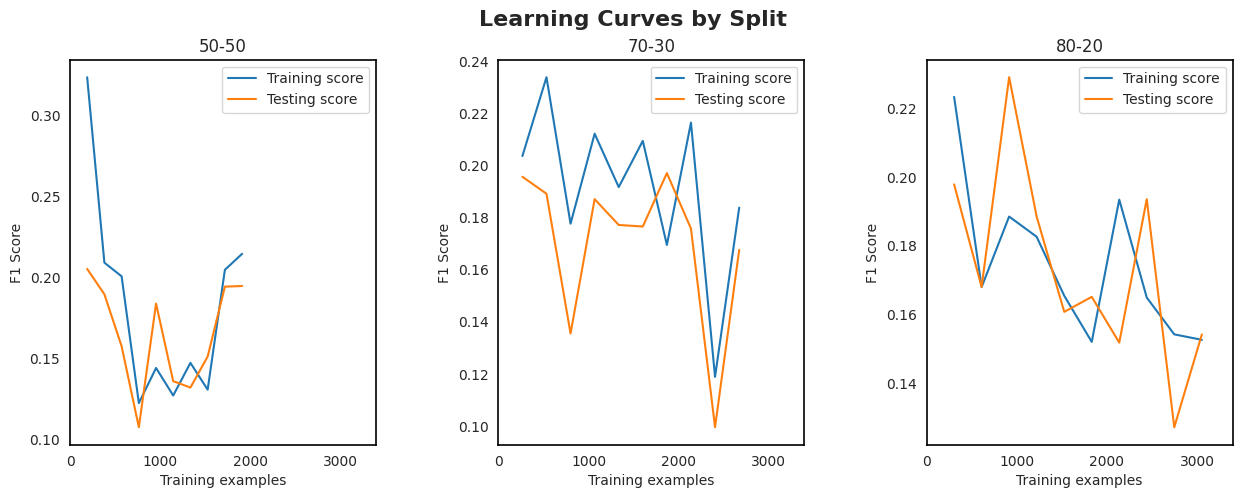


The best split is 50-50 with a mean f1 score of 0.21426088050932685.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', Perceptron())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    # Perform RandomizedSearchCV to find best hyperparameters
    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
          'clf__alpha': np.logspace(-5, 1, 100),
          'clf__max_iter': [100, 500, 1000]
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---


------------Perceptron Classification Report-----------

               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1799
           1       0.36      0.07      0.12       321

    accuracy                           0.84      2120
   macro avg       0.61      0.53      0.52      2120
weighted avg       0.78      0.84      0.79      2120





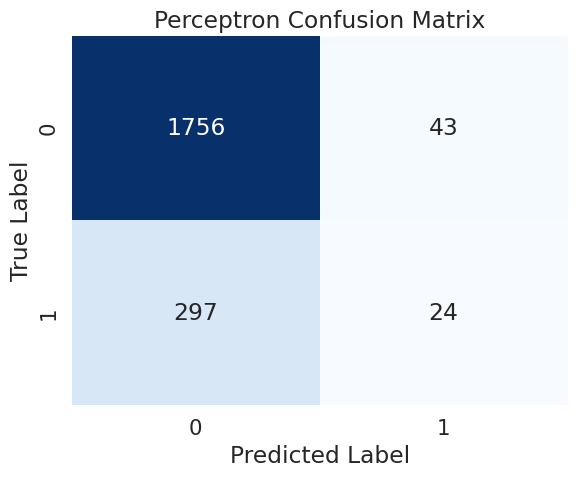

In [ ]:
# {'preprocessor__imputer__n_neighbors': 8, 'clf__max_iter': 1000, 'clf__alpha': 4.037017258596558e-05}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=8), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', Perceptron(max_iter = 1000,
                       alpha = 4.037017258596558e-05                       
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred2 = pipeline.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test,y_pred2)
rec2 = recall_score(y_test,y_pred2)
F12 = f1_score(y_test,y_pred2)


print(f"Perceptron Classification Report".center(55, "-"))
print('\n',classification_report(y_test, y_pred2))
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred2)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Perceptron Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u>3. Naive Bayes (Multinomial)

<div align="center"> TRAINING

---


-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 2, 'clf__fit_prior': True, 'clf__class_prior': [0.5, 0.5], 'clf__alpha': 0.54}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.186972      0.551601  0.279279        0.580713
fold 2          0.187648      0.556338  0.280639        0.575472
fold 3          0.181818      0.542857  0.272401        0.574423
fold 4          0.186905      0.552817  0.279359        0.575472
fold 5          0.184795      0.542955  0.275742        0.564990
fold 6          0.182260      0.531915  0.271493        0.578092
fold 7          0.197232      0.413043  0.266979        0.671908
fold 8          0.187141      0.573944  0.282251        0.565514
fold 9          0.180460      0.550877  0.271861        0.559224
fold 10         0.182796      0.548387  0.274194        0.575472
mean            0.18580

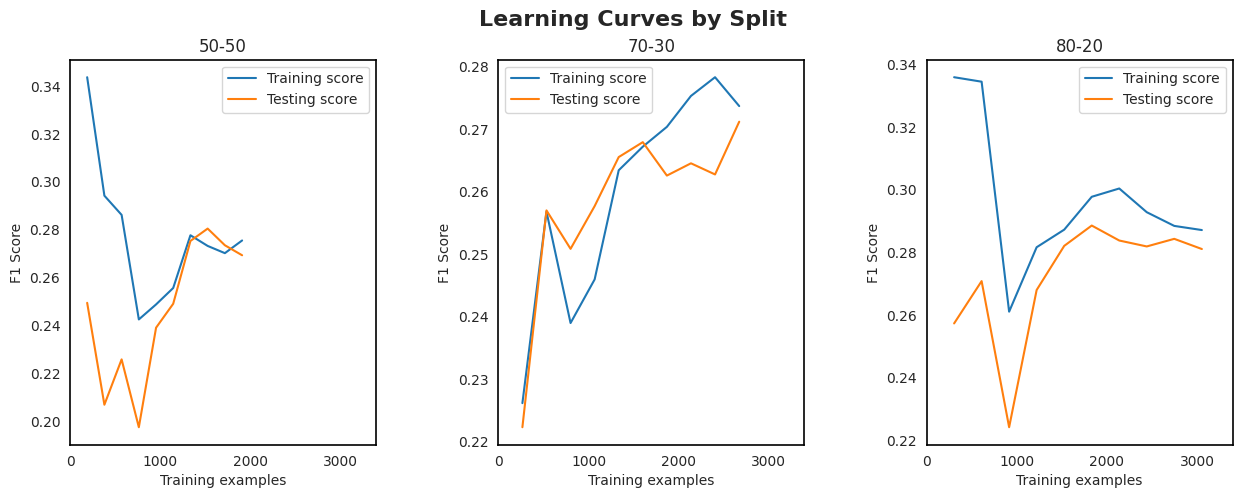


The best split is 80-20 with a mean f1 score of 0.28739455090668087.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
          'clf__alpha': np.linspace(0.01, 1.0, 100),
          'clf__fit_prior': [True, False],
          'clf__class_prior': class_prior_range
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---


----------Multinomial NB Classification Report---------

               precision    recall  f1-score   support

           0       0.88      0.59      0.71       717
           1       0.20      0.57      0.30       131

    accuracy                           0.59       848
   macro avg       0.54      0.58      0.50       848
weighted avg       0.78      0.59      0.64       848





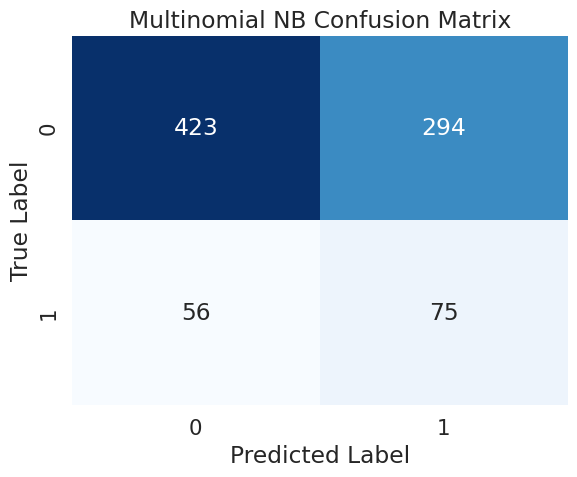

In [ ]:
# {'preprocessor__imputer__n_neighbors': 12, 'clf__fit_prior': True, 'clf__class_prior': [0.5, 0.5], 'clf__alpha': 0.37}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.2, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=12), missing_cols)])),
    ('scaler', MinMaxScaler()),
    ('clf', MultinomialNB(fit_prior = True,
                          class_prior = [0.5,0.5],
                          alpha = .37
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred3 = pipeline.predict(X_test) #*
acc3 = accuracy_score(y_test, y_pred3) #*
prec3 = precision_score(y_test,y_pred3) #*
rec3 = recall_score(y_test,y_pred3) #*
F13 = f1_score(y_test,y_pred3) #*


print(f"Multinomial NB Classification Report".center(55, "-"))
print('\n',classification_report(y_test, y_pred3)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred3) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Multinomial NB Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### <u>4. Logistic Regression

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 3, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 1.631281252503011}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.217755      0.464286  0.296465        0.676625
fold 2          0.219634      0.461538  0.297632        0.673480
fold 3          0.218391      0.473310  0.298876        0.672956
fold 4          0.217600      0.482270  0.299890        0.667191
fold 5          0.209651      0.451613  0.286364        0.670860
fold 6          0.214286      0.496324  0.299335        0.668763
fold 7          0.226016      0.494662  0.310268        0.676101
fold 8          0.218274      0.474265  0.298957        0.682914
fold 9          0.217028      0.471014  0.297143        0.677673
fold 10         0.205832      0.456274  0.283688        0.682390
mean           

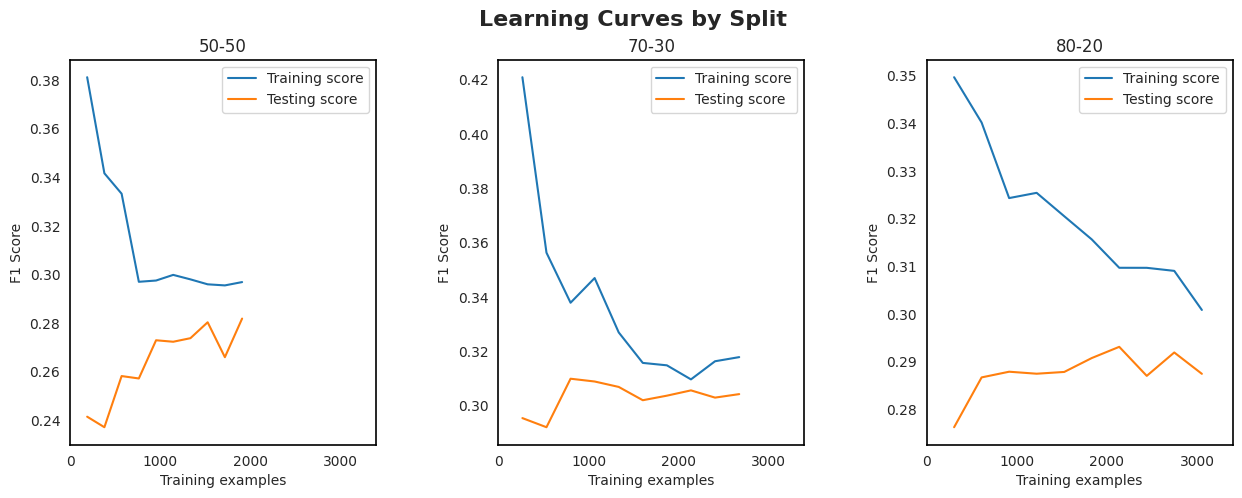


The best split is 70-30 with a mean f1 score of 0.31789832415098473.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
# Define the pipeline
# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
          'clf__C': np.random.uniform(low=0, high=4, size=(100,)),
          'clf__penalty': ['l2'],
          'clf__class_weight': ['balanced', None]
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---

-------Logistic Regression Classification Report-------

               precision    recall  f1-score   support

           0       0.89      0.65      0.75      1079
           1       0.21      0.53      0.31       193

    accuracy                           0.63      1272
   macro avg       0.55      0.59      0.53      1272
weighted avg       0.78      0.63      0.68      1272





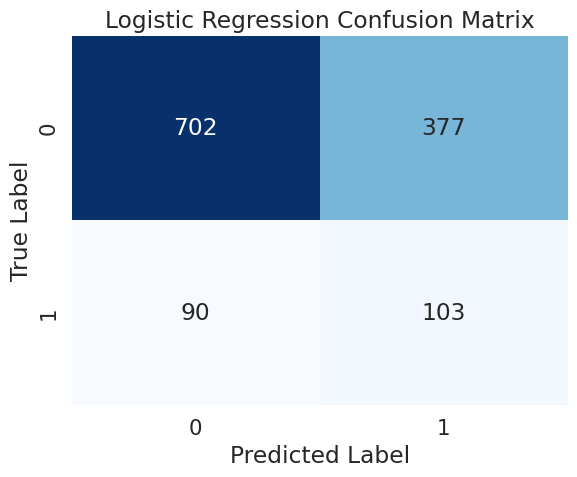

In [ ]:
#{'preprocessor__imputer__n_neighbors': 16, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 0.20094005460822872}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.3, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=16), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(penalty = 'l2',
                                class_weight = 'balanced',
                                C = 0.20094005460822872
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred4 = pipeline.predict(X_test) #*
acc4 = accuracy_score(y_test, y_pred4) #*
prec4 = precision_score(y_test,y_pred4) #*
rec4 = recall_score(y_test,y_pred4) #*
F14 = f1_score(y_test,y_pred4) #*


print(f"Logistic Regression Classification Report".center(55, "-"))
print('\n',classification_report(y_test, y_pred4)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred4) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 5. Linear Regression (with regularization - Ridge) [EC]

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 6, 'clf__fit_intercept': False, 'clf__alpha': 1}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.203290      0.588435  0.302183        0.581237
fold 2          0.193699      0.572414  0.289451        0.572851
fold 3          0.203016      0.603448  0.303819        0.579665
fold 4          0.198824      0.578767  0.295972        0.578616
fold 5          0.195178      0.607143  0.295395        0.574948
fold 6          0.196721      0.579310  0.293706        0.576520
fold 7          0.194575      0.589286  0.292553        0.581761
fold 8          0.193317      0.556701  0.286980        0.578092
fold 9          0.198830      0.586207  0.296943        0.578092
fold 10         0.194774      0.579505  0.291556        0.582285
mean            0.197223      0.584122  0.294856     

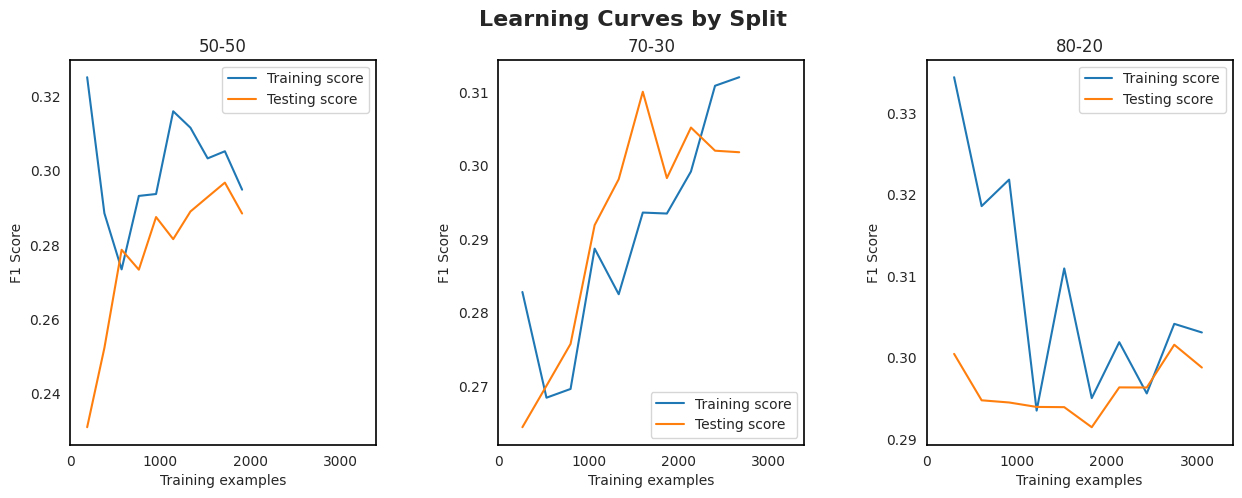


The best split is 70-30 with a mean f1 score of 0.3122423303652192.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', RidgeClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
         'clf__alpha': [0.001, 0.01, 0.1, 1, 10],
         'clf__fit_intercept': [True, False],
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---


--------Linear Regression Classification Report--------

               precision    recall  f1-score   support

           0       0.89      0.60      0.72      1079
           1       0.21      0.60      0.31       193

    accuracy                           0.60      1272
   macro avg       0.55      0.60      0.52      1272
weighted avg       0.79      0.60      0.66      1272





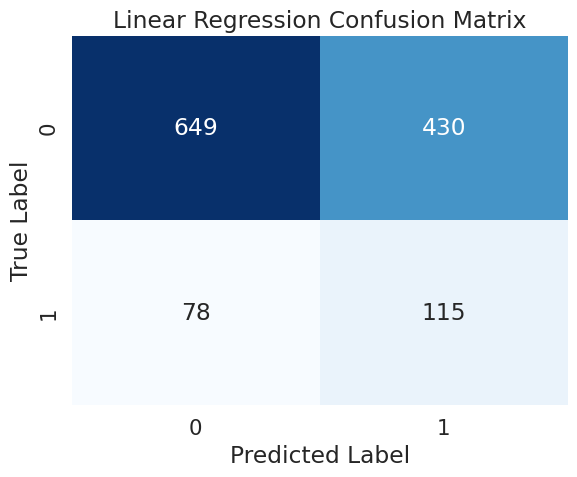

In [ ]:
# {'preprocessor__imputer__n_neighbors': 5, 'clf__fit_intercept': False, 'clf__alpha': 1}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.3, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', RidgeClassifier(fit_intercept = False,
                            alpha = 1
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred5 = pipeline.predict(X_test) #*
acc5 = accuracy_score(y_test, y_pred5) #*
prec5 = precision_score(y_test,y_pred5) #*
rec5 = recall_score(y_test,y_pred5) #*
F15 = f1_score(y_test,y_pred5) #*


print(f"Linear Regression Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred5)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred5) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Linear Regression Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 6.SVM - Linear Kernel

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 4, 'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 10.0}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.215278      0.530822  0.306324        0.632075
fold 2          0.212885      0.515254  0.301288        0.630503
fold 3          0.210526      0.538721  0.302744        0.613732
fold 4          0.221591      0.521739  0.311067        0.637841
fold 5          0.230303      0.503311  0.316008        0.655136
fold 6          0.218107      0.540816  0.310850        0.630503
fold 7          0.219178      0.542373  0.312195        0.630503
fold 8          0.216772      0.467577  0.296216        0.658805
fold 9          0.226686      0.524917  0.316633        0.642558
fold 10         0.228442      0.515358  0.316562        0.658281
me

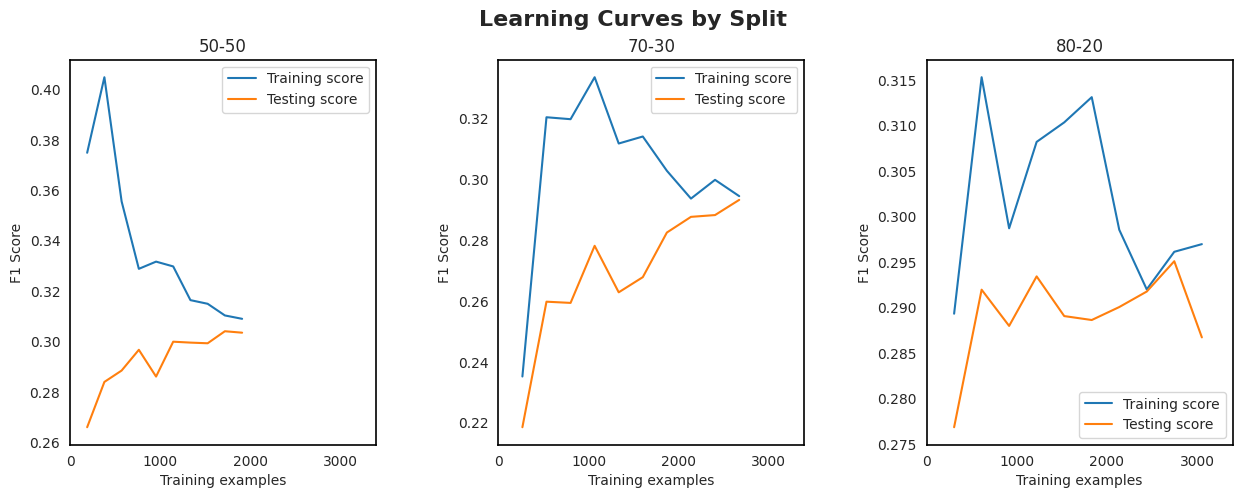


The best split is 50-50 with a mean f1 score of 0.3089888134091026.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])


# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
         'clf__kernel': ['linear'],
         'clf__C': np.logspace(-3, 3, 7),
         'clf__gamma': ['scale', 'auto'],
         'clf__class_weight': ['balanced']
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---

------------SVM-Linear Classification Report-----------

               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1794
           1       0.23      0.42      0.30       326

    accuracy                           0.69      2120
   macro avg       0.55      0.58      0.55      2120
weighted avg       0.78      0.69      0.73      2120





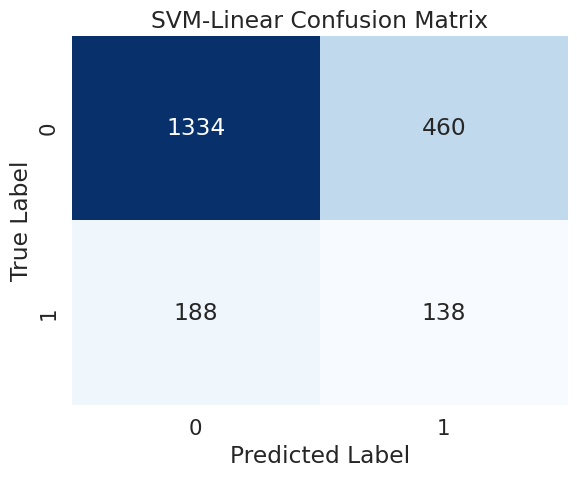

In [ ]:
# {'preprocessor__imputer__n_neighbors': 4, 'clf__kernel': 'linear', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 10.0}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5,random_state = 42)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=4), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='linear', C=10, gamma = 'scale', class_weight='balanced'))
    ])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred6 = pipeline.predict(X_test) #*
acc6 = accuracy_score(y_test, y_pred6) #*
prec6 = precision_score(y_test,y_pred6) #*
rec6 = recall_score(y_test,y_pred6) #*
F16 = f1_score(y_test,y_pred6) #*


print(f"SVM-Linear Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred6)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred6) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('SVM-Linear Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 7.SVM - RBF kernel

<div align="center"> TRAINING

---


-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 10, 'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 0.1}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.237681      0.581560  0.337449        0.662474
fold 2          0.235294      0.593640  0.337011        0.653564
fold 3          0.236695      0.592982  0.338338        0.653564
fold 4          0.248626      0.624138  0.355599        0.656184
fold 5          0.238544      0.623239  0.345029        0.647799
fold 6          0.238913      0.583916  0.339086        0.658805
fold 7          0.235217      0.628070  0.342256        0.639413
fold 8          0.250373      0.567568  0.347466        0.669287
fold 9          0.238701      0.603571  0.342105        0.659329
fold 10         0.238520      0.642612  0.347907        0.632600
mean 

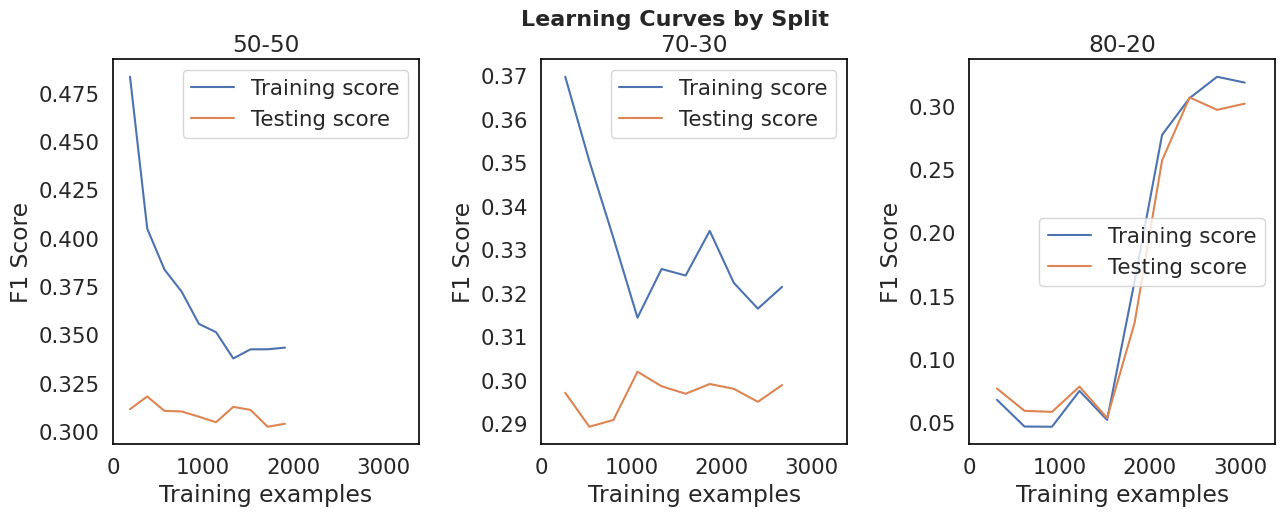


The best split is 50-50 with a mean f1 score of 0.3432247524387037.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])


# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
         'preprocessor__imputer__n_neighbors': np.arange(1, 21),
         'clf__kernel': ['rbf'],
         'clf__C': np.logspace(-3, 3, 7),
         'clf__gamma': ['scale', 'auto'],
         'clf__class_weight': ['balanced']
         }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---


-------------SVM-RBF Classification Report-------------

               precision    recall  f1-score   support

           0       0.89      0.65      0.75      1794
           1       0.23      0.56      0.32       326

    accuracy                           0.64      2120
   macro avg       0.56      0.61      0.54      2120
weighted avg       0.79      0.64      0.69      2120





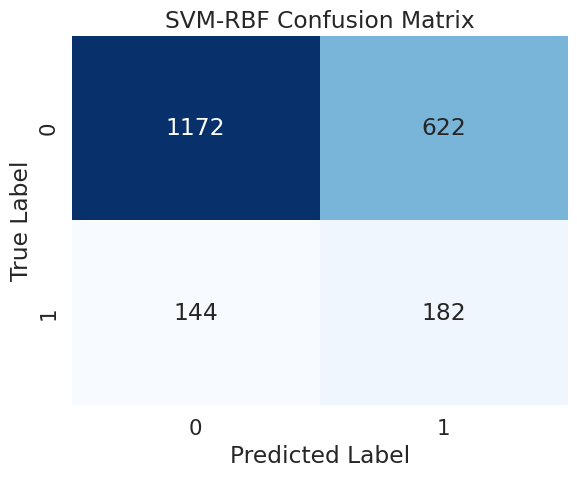

In [ ]:
# {'preprocessor__imputer__n_neighbors': 10, 'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 0.1}
X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5, random_state=42)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=10), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', C=0.1, gamma = 'scale', class_weight='balanced'))
    ])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred7 = pipeline.predict(X_test) #*
acc7 = accuracy_score(y_test, y_pred7) #*
prec7 = precision_score(y_test,y_pred7) #*
rec7 = recall_score(y_test,y_pred7) #*
F17 = f1_score(y_test,y_pred7) #*


print(f"SVM-RBF Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred7)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred7) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('SVM-RBF Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 8.Gradient Boosting

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 16, 'clf__n_estimators': 100, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': 3, 'clf__learning_rate': 1}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.965812      0.766102  0.854442        0.959644
fold 2          0.973333      0.730000  0.834286        0.954403
fold 3          0.962085      0.690476  0.803960        0.948113
fold 4          0.977778      0.730897  0.836502        0.954927
fold 5          0.944954      0.695946  0.801556        0.946541
fold 6          0.972222      0.697674  0.812379        0.949161
fold 7          0.972851      0.709571  0.820611        0.950734
fold 8          0.963470      0.696370  0.808429        0.947589
fold 9          0.981481      0.706667  0.821705        0.951782
fold

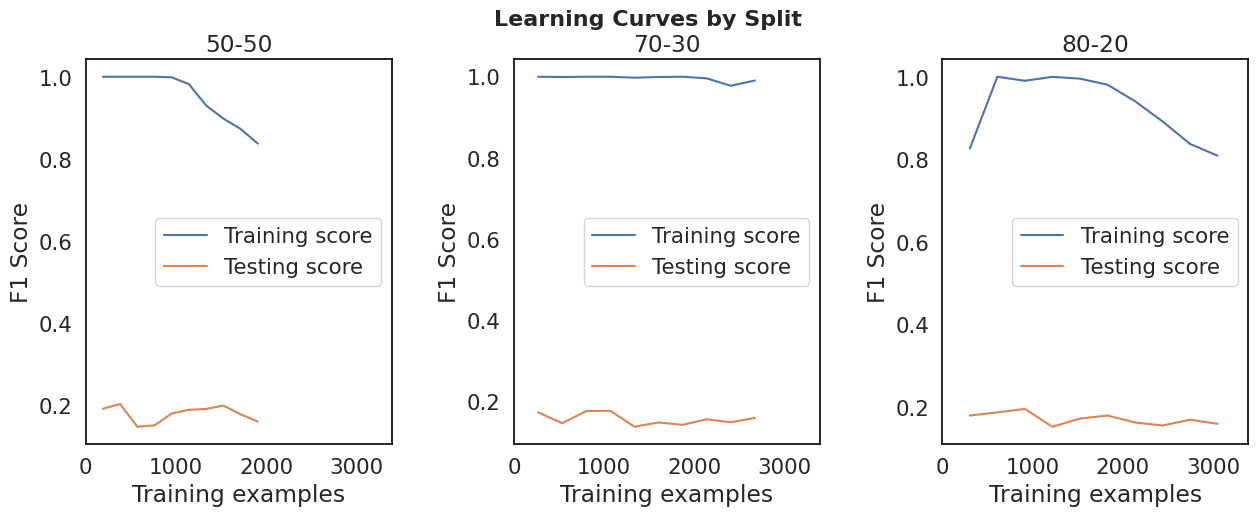


The best split is 70-30 with a mean f1 score of 0.9754314874924864.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
    'preprocessor__imputer__n_neighbors': np.arange(1, 21),
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None],
    }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---

--------Gradient Boosting Classification Report--------

               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1079
           1       0.24      0.17      0.20       193

    accuracy                           0.79      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.76      0.79      0.78      1272





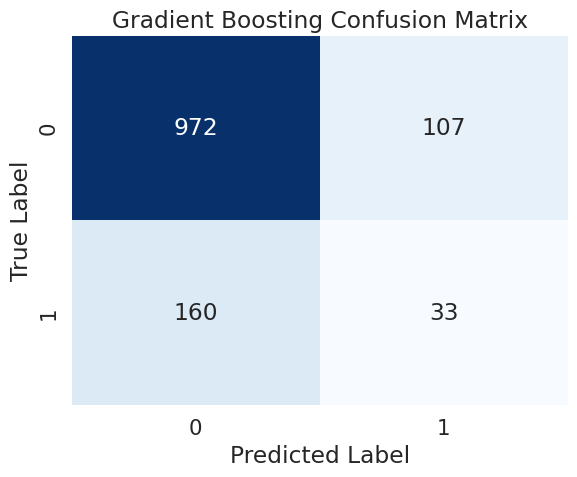

In [ ]:
# {'preprocessor__imputer__n_neighbors': 14, 'clf__n_estimators': 200, 'clf__min_samples_split': 2, 
# 'clf__min_samples_leaf': 1, 'clf__max_features': None, 'clf__max_depth': 3, 'clf__learning_rate': 1}


X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.3, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=14), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier(n_estimators = 200,
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       max_features = None,
                                       max_depth = 3,
                                       learning_rate = 1
                                    
))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred8 = pipeline.predict(X_test) #*
acc8 = accuracy_score(y_test, y_pred8) #*
prec8 = precision_score(y_test,y_pred8) #*
rec8 = recall_score(y_test,y_pred8) #*
F18 = f1_score(y_test,y_pred8) #*


print(f"Gradient Boosting Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred8)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred8) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('Gradient Boosting Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 9.Multi-layer Perceptron (MLP)

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 3, 'clf__learning_rate_init': 0.01, 'clf__hidden_layer_sizes': (50, 50), 'clf__alpha': 0.001, 'clf__activation': 'relu'}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.971888      0.817568  0.888073        0.968029
fold 2          0.950311      0.525773  0.676991        0.923480
fold 3          0.919192      0.636364  0.752066        0.937107
fold 4          0.979079      0.826855  0.896552        0.971698
fold 5          0.879195      0.912892  0.895726        0.968029
fold 6          0.990991      0.758621  0.859375        0.962264
fold 7          0.936803      0.890459  0.913043        0.974843
fold 8          0.947154      0.817544  0.877589        0.965933
fold 9          0.961207      0.779720  0.861004        0.962264
fold 10         0.932143      0.919014  0.9255

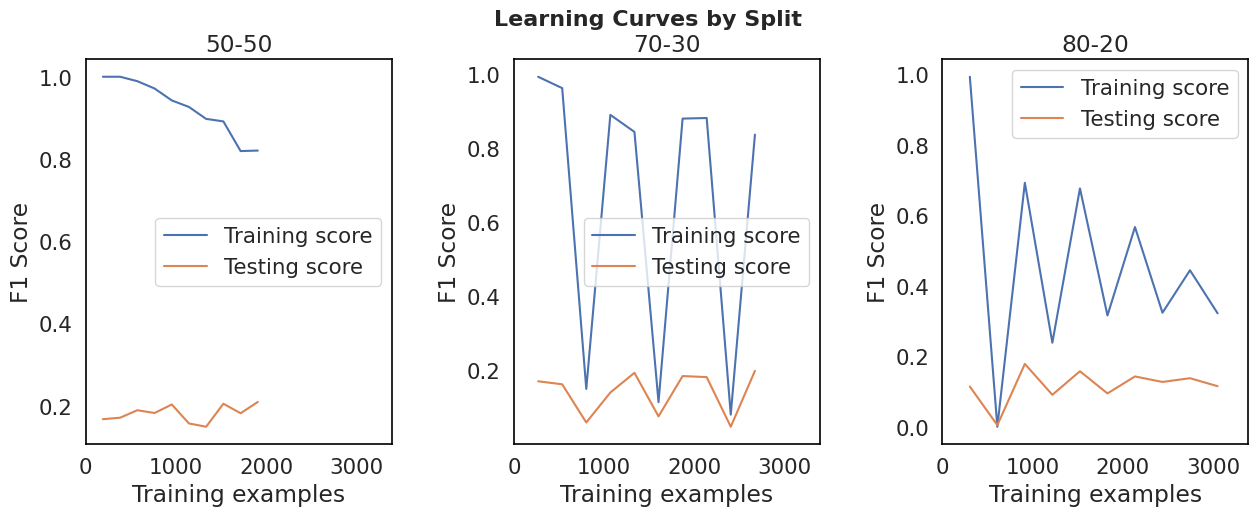


The best split is 50-50 with a mean f1 score of 0.8545952588523784.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
    'preprocessor__imputer__n_neighbors': np.arange(1, 21),
    'clf__hidden_layer_sizes' : [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200)],
    'clf__activation' : ['relu', 'tanh', 'logistic'],
    'clf__learning_rate_init' : [0.01, 0.001, 0.0001],
    'clf__alpha' : [0.1, 0.01, 0.001]
    }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")


<div align="center"> EVALUATING

---

---------------MLP Classification Report---------------

               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1799
           1       0.24      0.17      0.20       321

    accuracy                           0.79      2120
   macro avg       0.55      0.54      0.54      2120
weighted avg       0.77      0.79      0.78      2120





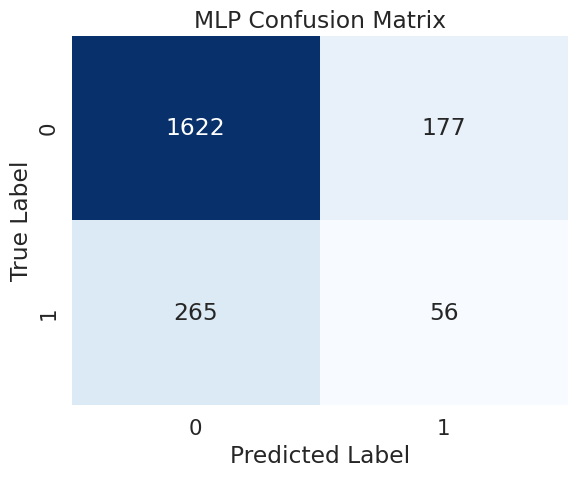

In [ ]:
# {'preprocessor__imputer__n_neighbors': 3, 'clf__learning_rate_init': 0.01, 
#'clf__hidden_layer_sizes': (50, 50), 'clf__alpha': 0.001, 'clf__activation': 'relu'}




X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=3), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(learning_rate_init = .01,
                hidden_layer_sizes = (50,50),
                alpha = .001,
                activation = 'relu'))])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred9 = pipeline.predict(X_test) #*
acc9 = accuracy_score(y_test, y_pred9) #*
prec9 = precision_score(y_test,y_pred9) #*
rec9 = recall_score(y_test,y_pred9) #*
F19 = f1_score(y_test,y_pred9) #*


print(f"MLP Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred9)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred9) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('MLP Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 10. KNN (EC #1)

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 2, 'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 1}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1               1.0           1.0       1.0             1.0
fold 2               1.0           1.0       1.0             1.0
fold 3               1.0           1.0       1.0             1.0
fold 4               1.0           1.0       1.0             1.0
fold 5               1.0           1.0       1.0             1.0
fold 6               1.0           1.0       1.0             1.0
fold 7               1.0           1.0       1.0             1.0
fold 8               1.0           1.0       1.0             1.0
fold 9               1.0           1.0       1.0             1.0
fold 10              1.0           1.0       1.0             1.0
mean                 1.0           

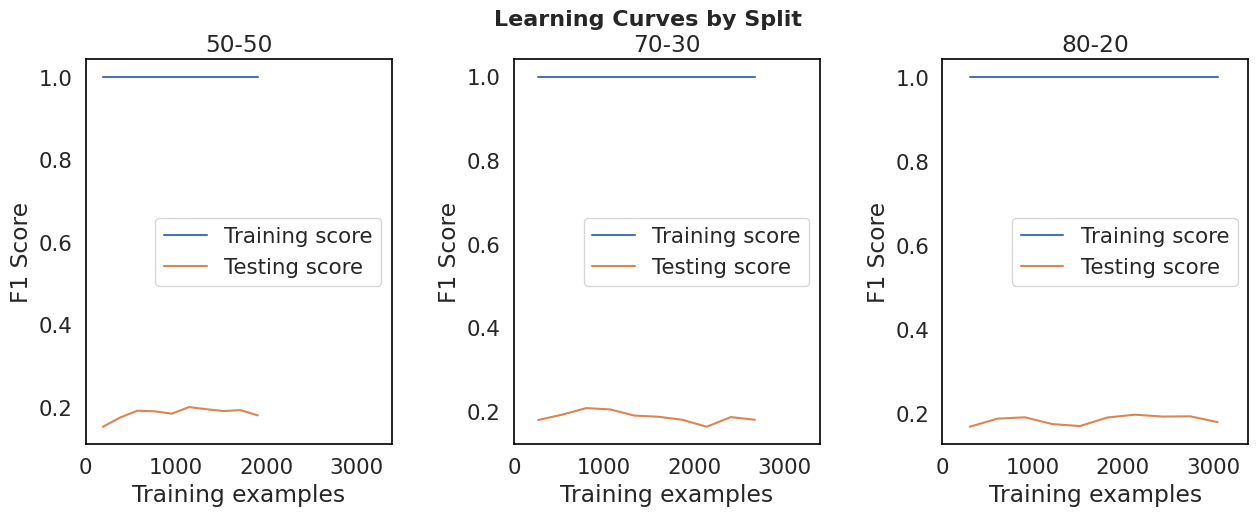


The best split is 50-50 with a mean f1 score of 1.0.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
    'preprocessor__imputer__n_neighbors': np.arange(1, 21),
    'clf__n_neighbors': np.arange(1, 21), 
    'clf__weights': ['uniform', 'distance'], 
    'clf__p': [1, 2]
    }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")

<div align="center"> EVALUATING

---

---------------KNN Classification Report---------------

               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1799
           1       0.17      0.15      0.16       321

    accuracy                           0.76      2120
   macro avg       0.51      0.51      0.51      2120
weighted avg       0.75      0.76      0.76      2120





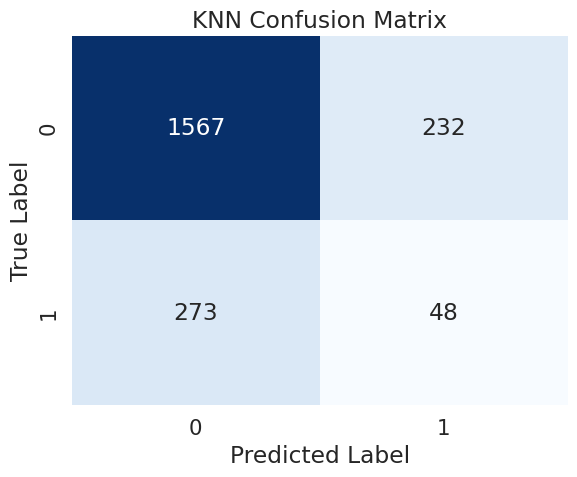

In [ ]:
# {'preprocessor__imputer__n_neighbors': 2, 'clf__weights': 'distance', 'clf__p': 1, 'clf__n_neighbors': 1}
X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=2), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(weights = 'distance',
                                 p = 1,
                                 n_neighbors = 1)
)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred10 = pipeline.predict(X_test) #*
acc10 = accuracy_score(y_test, y_pred10) #*
prec10 = precision_score(y_test,y_pred10) #*
rec10 = recall_score(y_test,y_pred10) #*
F110 = f1_score(y_test,y_pred10) #*


print(f"KNN Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred10)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred10) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('KNN Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 11. AdaBoost (EC #2)

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 10, 'clf__n_estimators': 200, 'clf__learning_rate': 1, 'clf__algorithm': 'SAMME.R'}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.850000      0.118881  0.208589        0.864780
fold 2          0.850000      0.123188  0.215190        0.870021
fold 3          0.869565      0.138408  0.238806        0.866352
fold 4          0.775510      0.133803  0.228228        0.865304
fold 5          0.842105      0.109589  0.193939        0.860587
fold 6          0.803922      0.139456  0.237681        0.862159
fold 7          0.769231      0.138408  0.234604        0.863208
fold 8          0.826087      0.130584  0.225519        0.863208
fold 9          0.769231      0.107527  0.188679        0.864780
fold 10         0.837209      0.127660  0.221538        0.867400
mean            0.

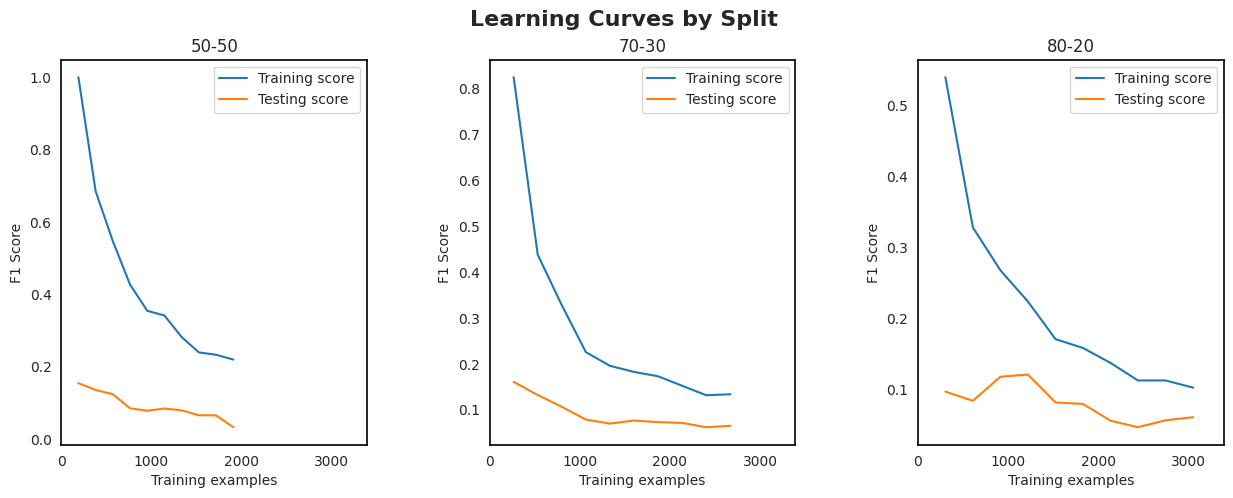


The best split is 50-50 with a mean f1 score of 0.2192774682437258.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
    'preprocessor__imputer__n_neighbors': np.arange(1, 21),
      'clf__n_estimators': [50, 100, 200],
     'clf__learning_rate': [0.01, 0.1, 1],
     'clf__algorithm': ['SAMME', 'SAMME.R']
    }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")

<div align="center"> EVALUATING

---

-------------AdaBoost Classification Report------------

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1799
           1       0.21      0.02      0.04       321

    accuracy                           0.84      2120
   macro avg       0.53      0.50      0.48      2120
weighted avg       0.75      0.84      0.78      2120





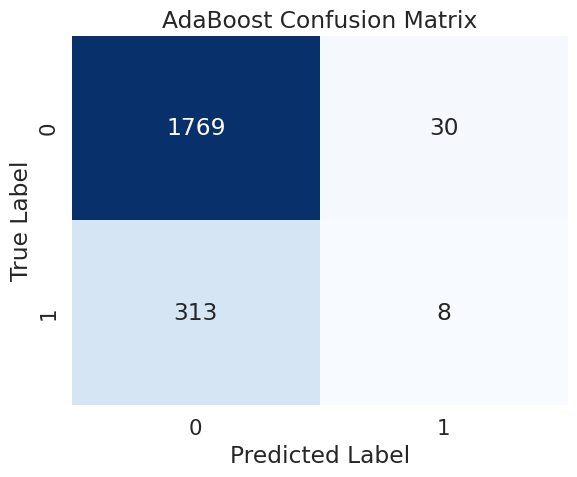

In [ ]:
# {'preprocessor__imputer__n_neighbors': 10, 'clf__n_estimators': 200,
# 'clf__learning_rate': 1, 'clf__algorithm': 'SAMME.R'}

X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.5, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=10), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators = 200,
                               learning_rate = 1,
                               algorithm = 'SAMME.R'
))])


# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred11 = pipeline.predict(X_test) #*
acc11 = accuracy_score(y_test, y_pred11) #*
prec11 = precision_score(y_test,y_pred11) #*
rec11 = recall_score(y_test,y_pred11) #*
F111 = f1_score(y_test,y_pred11) #*


print(f"AdaBoost Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred11)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred11) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('AdaBoost Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### <u> 12. XBG EC #3

<div align="center"> TRAINING

---

-----------------------------------------Results for 50-50------------------------------------------

Best hyperparameters: 
{'preprocessor__imputer__n_neighbors': 4, 'clf__subsample': 0.5, 'clf__n_estimators': 100, 'clf__max_depth': 3, 'clf__learning_rate': 1, 'clf__colsample_bytree': 0.5}


Training scores:
         train_precision  train_recall  train_f1  train_accuracy
fold 1          0.714286      0.542373  0.616570        0.895702
fold 2          0.705314      0.505190  0.588710        0.893082
fold 3          0.735043      0.577181  0.646617        0.901468
fold 4          0.713043      0.563574  0.629559        0.898847
fold 5          0.704918      0.573333  0.632353        0.895178
fold 6          0.693333      0.536082  0.604651        0.893082
fold 7          0.707071      0.496454  0.583333        0.895178
fold 8          0.695652      0.500000  0.581818        0.891509
fold 9          0.685039      0.581940  0.629295        0.892558
fold 10         0.648069      0.501661 

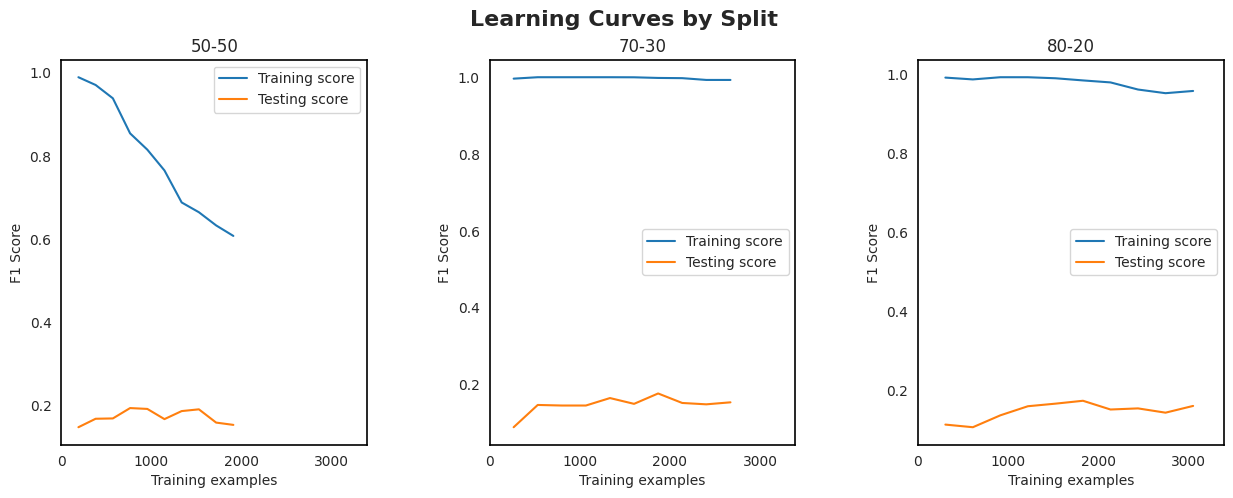


The best split is 70-30 with a mean f1 score of 0.991900174212423.


In [ ]:
sns.set_style("whitegrid")

# Set matplotlib settings
plt.rcParams.update({
    "axes.facecolor": "white",  # Set subplot background color
    "axes.grid": False,  # Remove grid
    "axes.edgecolor": "black",  # Set bounding box color
    "axes.linewidth": 1.2  # Set bounding box width
})


# Load the dataset
df = pd.read_csv("framingham.csv")

# Define columns with missing values
missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate','glucose']

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
    ('imputer', KNNImputer(n_neighbors=5), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier())
])

# Define test size splits
splits = {
    "50-50": 0.5,
    "70-30": 0.3,
    "80-20": 0.2
}

# Define scoring metrics
scoring = ["precision", "recall", "f1", "accuracy"]
train_scoring = ["train_" + metric for metric in scoring]

# Define dictionary to store results
results = {}


fig, axes = plt.subplots(1, len(splits), figsize=(15,5), sharex=True)
fig.suptitle('Learning Curves by Split', fontsize=16, fontweight='bold')



# Loop over test size splits
for i, (split, test_size) in enumerate(splits.items()):
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],
                                                        test_size=test_size)

    # Perform RandomizedSearchCV to find best hyperparameters
    class_prior_range = [[0.9, 0.1], [0.7, 0.3], [0.5, 0.5]]

    param_distributions= {
    'preprocessor__imputer__n_neighbors': np.arange(1, 21),
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__subsample': [0.5, 0.7, 0.9],
    'clf__colsample_bytree': [0.5, 0.7, 0.9],
    'clf__n_estimators': [50, 100, 200]
    }
    
    random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring="f1", n_jobs=-1, error_score='raise')
    random_search.fit(X_train, y_train)

    # Perform cross-validation using best estimator from RandomizedSearchCV
    kfold = KFold(n_splits=10, shuffle=True, random_state=1234)
    cv_results = cross_validate(random_search.best_estimator_, X_train, y_train, cv=kfold, n_jobs=-1, scoring=scoring, return_train_score=True)

    # Store results in dictionary
    results[split] = cv_results

    # Print best hyperparameters found
    print(f"Results for {split}".center(100, "-"))
    print(f"\nBest hyperparameters: \n{random_search.best_params_}\n")

    # Print scores of each fold and mean of each score as a dataframe table
    scores_df = pd.DataFrame(results[split])
    scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)
    scores_df.loc['mean'] = scores_df.mean()
    train_scores_df = scores_df[train_scoring]

    # Modify row names to display fold number without the word "fold"
    train_scores_df.index = [f"fold {idx+1}" if idx != len(train_scores_df.index)-1 else 'mean' for idx in range(len(train_scores_df.index))]
  
    print("\nTraining scores:")
    print(train_scores_df.to_string(index=True))
    print('\n')
    print('\n')

    # Plot learning curves for f1 score on current split
    train_sizes, train_scores, test_scores = learning_curve(random_search.best_estimator_, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10), cv=kfold, n_jobs=-1, scoring="f1")
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    axes[i].set_xlim([0, X_train.shape[0]])
    axes[i].set_xticks(np.arange(0, X_train.shape[0], 1000))
    axes[i].plot(train_sizes, train_mean, label="Training score")
    axes[i].plot(train_sizes, test_mean, label="Testing score")
    axes[i].set_title(f"{split}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("F1 Score")
    axes[i].grid(False)
    axes[i].legend()

# Show plot
plt.subplots_adjust(wspace=0.4)
plt.show()


best_split = None
best_f1_mean = 0

for split, results_df in results.items():
    f1_mean = results_df["train_f1"].mean()
    if f1_mean > best_f1_mean:
        best_split = split
        best_f1_mean = f1_mean

print(f"\nThe best split is {best_split} with a mean f1 score of {best_f1_mean}.")

<div align="center"> EVALUATING

---

---------------XBG Classification Report---------------

               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1079
           1       0.18      0.15      0.16       193

    accuracy                           0.76      1272
   macro avg       0.51      0.51      0.51      1272
weighted avg       0.75      0.76      0.76      1272





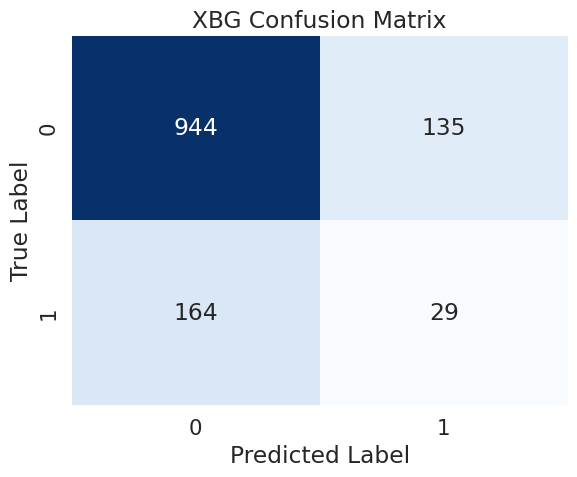

In [ ]:
# {'preprocessor__imputer__n_neighbors': 1, 'clf__subsample': 0.5, 'clf__n_estimators': 200,
#  'clf__max_depth': 5, 'clf__learning_rate': 1, 'clf__colsample_bytree': 0.7}


X_train, X_test, y_train, y_test = train_test_split(df.drop("TenYearCHD", axis=1), df["TenYearCHD"],test_size=.3, random_state=1234)


missing_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('imputer', KNNImputer(n_neighbors=1), missing_cols)])),
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(subsample = 0.5,
                          n_estimators = 200,
                          max_depth = 5,
                          learning_rate = 1,
                          colsample_bytree = 0.7
))])


# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict the target values on the testing set

y_pred12 = pipeline.predict(X_test) #*
acc12 = accuracy_score(y_test, y_pred12) #*
prec12 = precision_score(y_test,y_pred12) #*
rec12 = recall_score(y_test,y_pred12) #*
F112 = f1_score(y_test,y_pred12) #*


print(f"XBG Classification Report".center(55, "-")) #*
print('\n',classification_report(y_test, y_pred12)) #*
print('\n')

# Create a colored confusion matrix plot
cm = confusion_matrix(y_test, y_pred12) #*
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="g",cbar=False)
plt.title('XBG Confusion Matrix') #*
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Big 3 Tables

In [ ]:
results_df = pd.DataFrame({'Model': ['Random Forest', 'Perceptron','Naive Bayes', 'Logistic Regression',
                                     'Linear Regression','SVM - Linear','SVM - RB','Gradient Boosting',
                                     'MLP','KNN','AdaBoost','XBG'],
                           'Accuracy': [acc1, acc2, acc3,acc4, acc5, acc6, acc7, acc8,acc9,acc10,acc11,acc12],
                           'Recall':[rec1, rec2, rec3,rec4,rec5,rec6,rec7,rec8,rec9,rec10,rec11,rec12],
                           'Precision':[prec1, prec2, prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12]})

print(results_df)

                  Model  Accuracy    Recall  Precision
0         Random Forest  0.689858  0.396947   0.220339
1            Perceptron  0.839623  0.074766   0.358209
2           Naive Bayes  0.587264  0.572519   0.203252
3   Logistic Regression  0.632862  0.533679   0.214583
4     Linear Regression  0.600629  0.595855   0.211009
5          SVM - Linear  0.694340  0.423313   0.230769
6              SVM - RB  0.638679  0.558282   0.226368
7     Gradient Boosting  0.790094  0.170984   0.235714
8                   MLP  0.791509  0.174455   0.240343
9                   KNN  0.761792  0.149533   0.171429
10             AdaBoost  0.838208  0.024922   0.210526
11                  XBG  0.764937  0.150259   0.176829


In [ ]:
f1_df = pd.DataFrame({'Model': ['Random Forest', 'Perceptron','Naive Bayes', 'Logistic Regression',
                                     'Linear Regression','SVM - Linear','SVM - RB','Gradient Boosting',
                                     'MLP','KNN','AdaBoost','XBG'],
                           'F1_score': [F11, F12, F13,F14,F15,F16,F17,F18,F19,F110,F111,F112]})

f1_df = f1_df.sort_values('F1_score', ascending=False).reset_index(drop=True)

print(f1_df.to_string(index=False))

              Model  F1_score
           SVM - RB  0.322124
  Linear Regression  0.311653
Logistic Regression  0.306092
        Naive Bayes  0.300000
       SVM - Linear  0.298701
      Random Forest  0.283379
                MLP  0.202166
  Gradient Boosting  0.198198
                XBG  0.162465
                KNN  0.159734
         Perceptron  0.123711
           AdaBoost  0.044568


In [ ]:
#Thank you :)